<font size="+5">#05. Hiperparametros del Modelo</font>

<ul>
    <li>Resolver dudas → Pregunta en <img src="https://discord.com/assets/f9bb9c4af2b9c32a2c5ee0014661546d.png" style="height: 1em; vertical-align: middle;"> <a href="https://discord.gg/cmB3KGsqMy">Discord</a></li>
    <li>Tutoriales → <img src="https://openmoji.org/php/download_asset.php?type=emoji&emoji_hexcode=E044&emoji_variant=color" style="height: 1em; vertical-align: middle;"> <a href="https://www.youtube.com/channel/UCovCte2I3loteQE_kRsfQcw">YouTube</a></li>
    <li>Reservar Clases → <span style="color: orange">@</span> <a href="https://sotastica.com/reservar">sotastica</a></li>
</ul>

# Cargar Datos

> Usamos una tabla del _[Respositorio de Datos de Machine Learning UCI](https://archive.ics.uci.edu/ml/datasets/adult)_. Esta tabla resume la información de personas que ganan más de 50,000 al año o menos. Por tanto, nuestro objetivo es desarrollar un modelo que calcule mejor si una persona gana por encima o por debajo de dicho umbral. La columna a predecir es la última.
>
> PD: Si te interesa conocer el nombre de las variables, puedes ir al enlace de del repositorio.

```python
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url, header=None, na_values=' ?')
df.rename(columns={14: 'target'}, inplace=True)
df.head()
```

> Copiamos y pegamos en la siguiente celda las líneas de código que aparecen justo arriba para descargar los datos de internet y almacenar la tabla en un `DataFrame` con el que trabajaremos durante la práctica.

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url, header=None, na_values=' ?')
df.rename(columns={14: 'target'}, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Seleccionar Variables

> 1. `Variable Objetivo y`
> 2. El resto las usaremos como `Variables Explicativas X`

In [11]:
X = df.iloc[:, :-1]

In [12]:
y = df.iloc[:, -1]

In [13]:
X = pd.get_dummies(X, drop_first=True)

# Entrenar Modelo `DecisionTreeClassifier()` por Defecto

> Usaremos los hiperparámetros que vienen por defecto (dejamos el paréntesis en blanco).

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
model = DecisionTreeClassifier(min_samples_leaf=1)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [30]:
X.shape

(32561, 97)

In [31]:
X_train.shape

(22792, 97)

In [32]:
X_test.shape

(9769, 97)

In [33]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

## Realidad vs Predicciones

> ¿Cómo de bueno es el modelo en los datos de **entrenamiento**?¿Y en los datos de **testeo**?

In [34]:
model.score(X=X_train, y=y_train)

1.0

In [35]:
model.score(X=X_test, y=y_test)

0.8106254478452247

## Visualizar Modelo

> - Usaremos la función `plot_tree()`, que se encuentra en el módulo `tree` de la librería `sklearn`
> - Podéis usar `shift + tab` para que `Python` os explique cómo usar la función `plot_tree()`

In [36]:
from sklearn.tree import plot_tree

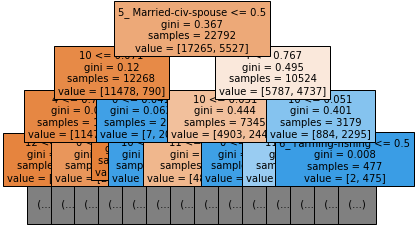

In [38]:
plot_tree(decision_tree=model, feature_names=X_train.columns, filled=True, max_depth=3, fontsize=10);

## Interpretar Modelo

> ¿Por qué el modelo es muy bueno en los datos de entrenamiento y tan malo en los datos de testeo?

# Entrenar Modelo `DecisionTreeClassifier()` con Diferentes Hiperparámetros

> - Debemos emplear el **objeto** `GridSearchCV()` para encontrar los mejores Hiperparámetros que nos den mejores resultados en datos que el modelo no conocía: enl los datos de testeo.
>
> Si queremos ver los hiperparámetros del modelo, ejecutaremos: `model.get_params()`
>
> Si queremos ver los posibles valores que deben tener los hiperpámetros, podemos ver la ayuda `shift + tab` sobre el paréntesis del objeto `DecisionTreeClassifier()`.

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
cv = GridSearchCV(estimator=model, param_grid={'min_samples_leaf': [10, 20, 40, 80, 160, 320]}, cv=5, verbose=2)

In [41]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ................................min_samples_leaf=10; total time=   0.1s
[CV] END ................................min_samples_leaf=10; total time=   0.1s
[CV] END ................................min_samples_leaf=10; total time=   0.1s
[CV] END ................................min_samples_leaf=10; total time=   0.1s
[CV] END ................................min_samples_leaf=10; total time=   0.1s
[CV] END ................................min_samples_leaf=20; total time=   0.1s
[CV] END ................................min_samples_leaf=20; total time=   0.1s
[CV] END ................................min_samples_leaf=20; total time=   0.1s
[CV] END ................................min_samples_leaf=20; total time=   0.1s
[CV] END ................................min_samples_leaf=20; total time=   0.1s
[CV] END ................................min_samples_leaf=40; total time=   0.1s
[CV] END ................................min_samp

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'min_samples_leaf': [10, 20, 40, 80, 160, 320]},
             verbose=2)

In [42]:
cv.best_params_

{'min_samples_leaf': 80}

In [43]:
model = DecisionTreeClassifier(min_samples_leaf=80)

In [44]:
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=80)

## Realidad vs Predicciones

> ¿Cómo de bueno es el modelo en los datos de **entrenamiento**?¿Y en los datos de **testeo**?

In [ ]:
model.score(X_train, y_train)

0.8595998595998596

In [ ]:
model.score(X_test, y_test)

0.8549493295117208

## Visualizar Modelo

> - Usaremos la función `plot_tree()`, que se encuentra en el módulo `tree` de la librería `sklearn`
> - Podéis usar `shift + tab` para que `Python` os explique cómo usar la función `plot_tree()`

In [33]:
from sklearn.tree import plot_tree

In [49]:
import matplotlib.pyplot as plt

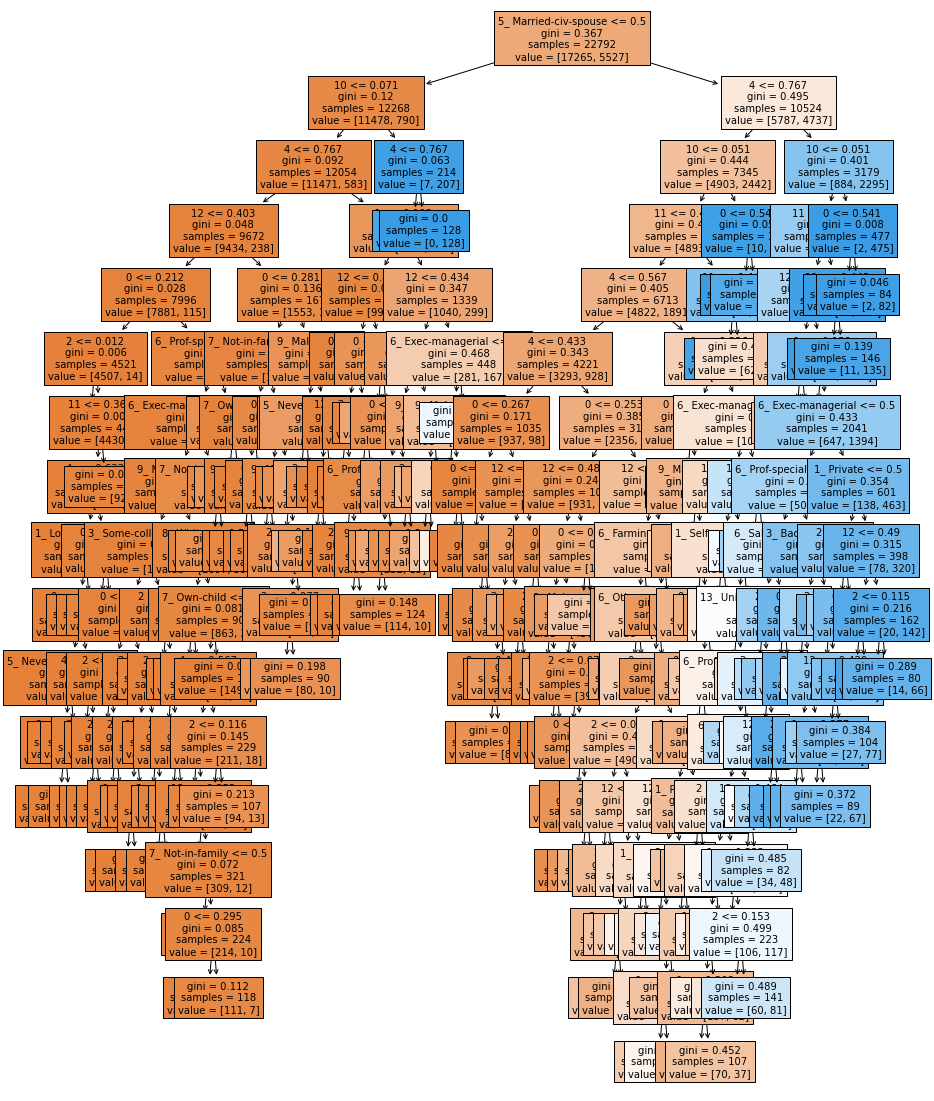

In [50]:
plt.figure(figsize=(15, 20))
plot_tree(decision_tree=model, feature_names=X_train.columns, filled=True, fontsize=10);

## Interpretar Modelo

> ¿Por qué el modelo es muy bueno en los datos de entrenamiento y tan malo en los datos de testeo?¿Por qué ha cambiado tanto la precisión en los datos de testeo al haber usado diferentes hiperparámetros?

In [ ]:
porque hemos ajustado más los datos para aquellos que aun no conocemos

# Configurar Hiperparámetros de Otros Modelos

## K Nearest Neighbours

> Aquí tan solo debemos configurar el número K de vecinos a tener en cuenta.

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
model = KNeighborsClassifier()

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [68]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [65]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
model.score(X_train, y_train)

0.8759213759213759

In [67]:
model.score(X_test, y_test)

0.8244446719213839

In [ ]:
import numpy as np

In [71]:
cv = GridSearchCV(estimator=model, param_grid={'n_neighbors': [5, 10, 20, 40, 80, 160, 320]}, cv=5, verbose=2)

In [72]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ......................................n_neighbors=5; total time=   1.7s
[CV] END ......................................n_neighbors=5; total time=   1.8s
[CV] END ......................................n_neighbors=5; total time=   1.7s
[CV] END ......................................n_neighbors=5; total time=   1.7s
[CV] END ......................................n_neighbors=5; total time=   1.7s
[CV] END .....................................n_neighbors=10; total time=   1.7s
[CV] END .....................................n_neighbors=10; total time=   1.7s
[CV] END .....................................n_neighbors=10; total time=   1.7s
[CV] END .....................................n_neighbors=10; total time=   1.7s
[CV] END .....................................n_neighbors=10; total time=   1.7s
[CV] END .....................................n_neighbors=20; total time=   1.6s
[CV] END .....................................n_n

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 20, 40, 80, 160, 320]},
             verbose=2)

In [73]:
cv.best_params_

{'n_neighbors': 320}

In [76]:
model = KNeighborsClassifier(n_neighbors=320)

In [77]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=320)

In [78]:
model.score(X_train, y_train)

0.8314320814320815

In [79]:
model.score(X_test, y_test)

0.8300747261746341

## Support Vector Machines

> _Durante la corrección te explicare en detalle el funcionamiento de este algoritmo. Mientras tanto, podéis ver el vídeo que usaré para que os relacionéis con los conceptos:_
>
> - https://www.youtube.com/watch?v=efR1C6CvhmE
>
> Además de un script en Internet:
>
> - https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
>
> Cambiad tan solo los hiperparámetros del coste `C` y el tipo de `kernel`. En el último enlace veréis los posibles valores con los que podemos jugar. Además, podréis ver qué significan cada uno de los hiperparámetros solicitando ayuda con `shift + tab`.

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
from sklearn.svm import SVC

In [81]:
model = SVC()

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [85]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [86]:
model.fit(X_train, y_train)

SVC()

In [87]:
model.score(X_train, y_train)

0.8438925938925939

In [88]:
model.score(X_test, y_test)

0.8371378851468932

In [89]:
import numpy as np

In [98]:
cv = GridSearchCV(estimator=model, param_grid={'C': [0.000001,0.0000001,0.00000001], 'kernel': ['rbf']}, cv=5, verbose=2)

In [99]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


KeyboardInterrupt: 

In [73]:
cv.best_params_

{'n_neighbors': 320}

In [76]:
model = KNeighborsClassifier(n_neighbors=320)

In [77]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=320)

In [78]:
model.score(X_train, y_train)

0.8314320814320815

In [79]:
model.score(X_test, y_test)

0.8300747261746341

# Objetivos Alcanzados

_Haz doble click sobre esta celda y pon una `X` dentro de las casillas [X] si crees que has superado los objetivos:_

- [X] Entender la importancia de la precisión de nuestro modelo en datos con los que no ha sido entrenado para evitar el sobreentrenamiento (**Ovefitting**).
- [X] Entender qué significan los hiperparámetros y cómo pueden llegar a modificar un modelo.
- [X] Importancia de la **aleatoriedad** como pieza fundamental de la estadística porque reduce el sesgo.